# WeatherPy
----
* OBERVATIONS
* 1 - Humidity, cloudiness, and wind speed are independent of latitude.
* 2 - There are more cities in the northern hemisphere.
* 3 - Generally it is hotter near the equator.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

574


In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_weather = []
city_data= []
counter = 1
set = 1

# Loop through the list of cities and perform a request for data on each and print a log.
print ("Beginning Data Retrieval")
print ("------------------------")

for city in cities:
    #Use URL plus name of city to connect to openweathermap.org's endpoint
        city_url = base_url + "&q=" + city
        try:
            city_weather = requests.get(city_url).json()
        # parse data and place values into variables that will be used for creating a df
            #pprint(city_weather)
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]
            city_data.append({"City": city,"Lat": city_lat,"lng": city_lng,"Max Temp": city_max_temp,"Humidity": city_humidity,"Cloudiness": city_clouds,
                         "Wind Speed": city_wind,"Country": city_country,"Date": city_date})
            print(f"processing record {counter} of set {set} | {city}")
            counter = counter + 1
            if counter > 50:
                counter = 1
                set = set + 1
                time.sleep(6) 
                #have to use sleep to overcome api call restriction, I can only make 300 api call per min.
        except:
            print(f"City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
processing record 1 of set 1 | esperance
processing record 2 of set 1 | butaritari
processing record 3 of set 1 | bluff
processing record 4 of set 1 | talcahuano
processing record 5 of set 1 | castro
processing record 6 of set 1 | mount gambier
processing record 7 of set 1 | tasiilaq
processing record 8 of set 1 | rikitea
processing record 9 of set 1 | hilo
processing record 10 of set 1 | margate
processing record 11 of set 1 | dikson
processing record 12 of set 1 | olinda
processing record 13 of set 1 | mataura
processing record 14 of set 1 | busselton
processing record 15 of set 1 | lagoa
processing record 16 of set 1 | ribeira grande
City not found. Skipping...
processing record 17 of set 1 | grants pass
City not found. Skipping...
City not found. Skipping...
processing record 18 of set 1 | saskylakh
processing record 19 of set 1 | lompoc
processing record 20 of set 1 | carnarvon
processing record 21 of set 1 | new norfolk
processing

processing record 38 of set 4 | srednekolymsk
processing record 39 of set 4 | ishigaki
processing record 40 of set 4 | tlalchapa
processing record 41 of set 4 | brae
processing record 42 of set 4 | cherskiy
City not found. Skipping...
processing record 43 of set 4 | conway
processing record 44 of set 4 | leshukonskoye
processing record 45 of set 4 | tuatapere
processing record 46 of set 4 | westport
processing record 47 of set 4 | glenwood springs
processing record 48 of set 4 | coihaique
processing record 49 of set 4 | lere
processing record 50 of set 4 | ancud
processing record 1 of set 5 | neustadt
processing record 2 of set 5 | katsuura
processing record 3 of set 5 | nuqui
processing record 4 of set 5 | yar-sale
processing record 5 of set 5 | adolfo lopez mateos
processing record 6 of set 5 | acapulco
processing record 7 of set 5 | carmelo
processing record 8 of set 5 | aklavik
processing record 9 of set 5 | sitangkai
processing record 10 of set 5 | sitka
processing record 11 of se

processing record 33 of set 8 | fakse ladeplads
City not found. Skipping...
processing record 34 of set 8 | shiroishi
processing record 35 of set 8 | merauke
processing record 36 of set 8 | pittsburg
processing record 37 of set 8 | west odessa
City not found. Skipping...
processing record 38 of set 8 | richards bay
processing record 39 of set 8 | axim
City not found. Skipping...
processing record 40 of set 8 | pahrump
processing record 41 of set 8 | morehead
processing record 42 of set 8 | usinsk
processing record 43 of set 8 | ulladulla
processing record 44 of set 8 | berlevag
processing record 45 of set 8 | sakakah
processing record 46 of set 8 | kovur
processing record 47 of set 8 | diglur
processing record 48 of set 8 | osmena
processing record 49 of set 8 | amapa
processing record 50 of set 8 | mount pleasant
processing record 1 of set 9 | kokopo
processing record 2 of set 9 | birsk
processing record 3 of set 9 | chuy
processing record 4 of set 9 | qaqortoq
processing record 5 of 

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_pd["Lat"]
max_temps = city_pd["Max Temp"]
humidity = city_pd["Humidity"]
cloudiness = city_pd["Cloudiness"]
wind_speed = city_pd["Wind Speed"]

# Export the City_Data into a csv
city_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_pd.count()

City          530
Lat           530
lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [6]:
city_pd.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.87,121.90,66.09,81,0,5.95,AU,1579969404
1,butaritari,3.07,172.79,84.49,74,0,10.09,KI,1579969404
2,bluff,-46.60,168.33,53.01,91,61,2.80,NZ,1579969388
3,talcahuano,-36.72,-73.12,61.23,56,0,12.84,CL,1579969405
4,castro,-24.79,-50.01,76.28,49,69,6.53,BR,1579969405


### Plotting the Data

#### Latitude vs. Temperature Plot

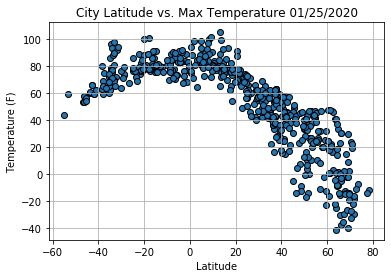

<Figure size 720x576 with 0 Axes>

In [24]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, max_temps, marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

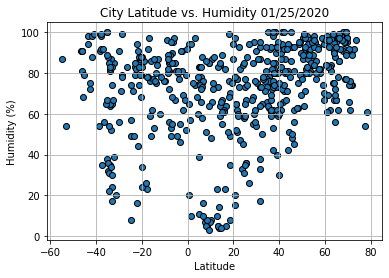

<Figure size 720x576 with 0 Axes>

In [20]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, humidity,marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

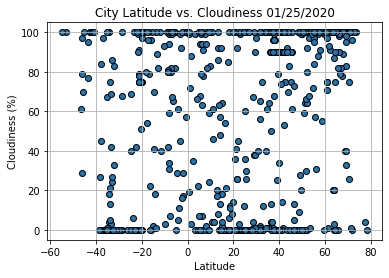

<Figure size 720x576 with 0 Axes>

In [21]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness,marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

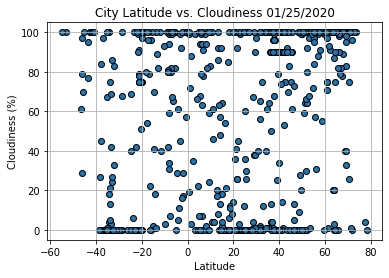

<Figure size 720x576 with 0 Axes>

In [22]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness, marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy.stats import linregress

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_pd.loc[city_pd.Lat >= 0]
southern_df = city_pd.loc[city_pd.Lat < 0]
print(northern_df.City.count())
print(southern_df.City.count())

372
158


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression